# Image Classification Model Deployment - CNN

**Raynold Panji Zulfiandi**

> Emotion Detection

> Dataset: https://www.kaggle.com/datasets/ananthu017/emotion-detection-fer

In [1]:
# %tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

2.6.4


In [2]:
# cek penggunaan GPU
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print('GPU device not found')
else:
  print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


2022-10-04 13:29:05.969190: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-04 13:29:06.029460: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-04 13:29:06.130887: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-04 13:29:06.131718: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

# Data Preparation

### Download Dataset (Google collbs)

In [3]:
!pip install -q kaggle
from google.colab import files 

# upload kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"raynoldpanji","key":"b99496bfa41cc4ec5d25a40027b9c1fa"}'}

In [4]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d ananthu017/emotion-detection-fer


 83% 54.0M/65.2M [00:00<00:00, 172MB/s]

100% 65.2M/65.2M [00:00<00:00, 165MB/s]


In [6]:
# !rm -rf datasets
!ls 

emotion-detection-fer.zip  kaggle.json	sample_data


In [7]:
!mkdir datasets
!unzip -q emotion-detection-fer.zip -d datasets
!ls datasets

test  train


### Download Datasets (kaggle notebook)

In [3]:
# !rm -rf datasets
!ls -al

total 16
drwxr-xr-x 3 root root 4096 Oct  4 13:28 .
drwxr-xr-x 5 root root 4096 Oct  4 13:28 ..
drwxr-xr-x 2 root root 4096 Oct  4 13:28 .virtual_documents
---------- 1 root root  263 Oct  4 13:28 __notebook_source__.ipynb


In [4]:
!mkdir ./datasets
!cp -r ../input/emotion-detection-fer/* ./datasets
!ls -al datasets

total 16
drwxr-xr-x 4 root root 4096 Oct  4 13:30 .
drwxr-xr-x 4 root root 4096 Oct  4 13:29 ..
drwxr-xr-x 9 root root 4096 Oct  4 13:29 test
drwxr-xr-x 9 root root 4096 Oct  4 13:33 train


In [5]:
!chmod 777 ./datasets/train
!chmod 777 ./datasets/test

!ls datasets/test

angry  disgusted  fearful  happy  neutral  sad	surprised


# Data Cleansing

In [6]:
import os

TRAINING_DIR = 'datasets/train/'
VALIDATION_DIR = 'datasets/test/'

os.listdir(TRAINING_DIR), os.listdir(VALIDATION_DIR)

(['angry', 'surprised', 'sad', 'disgusted', 'happy', 'neutral', 'fearful'],
 ['angry', 'surprised', 'sad', 'disgusted', 'happy', 'neutral', 'fearful'])

In [7]:
## cek jumlah dataset
def jum_data():
  train = []
  val = []
  lists = os.listdir(TRAINING_DIR)
  for cls in lists:
    train.append(len(os.listdir(os.path.join(TRAINING_DIR, cls))))
  for cls in lists:
    val.append(len(os.listdir(os.path.join(VALIDATION_DIR, cls))))
  return train, val, lists

def cek_data():
  chs = []
  train, val, lists = jum_data()
  
  msg="\n======================================"
  for i, cls in enumerate(lists):
    tot = train[i]+val[i]
    ch = round(tot*0.8)
    chs.append(ch-train[i])
    percen = ": "+str(80)+"% dari total ✓✓" if (ch==train[i]) else "-"
    msg=msg+f"\ntotal {cls}\t: {train[i]} ===> {ch} {percen}"
  msg=msg+"\ntotal : "+str(sum(train))
  
  msg=msg+"\n======================================"
  for i, cls in enumerate(lists):
    tot = train[i]+val[i]
    percen = ": "+str(20)+"% dari total ✓✓" if (round(tot*0.2)==val[i]) else "-"
    msg=msg+f"\ntotal {cls}\t: {val[i]} ===> {round(tot*0.2)} {percen}"
  msg=msg+"\ntotal : "+str(sum(val))

  msg=msg+"\n======================================"
  return msg, chs

print(cek_data()[0])
print(cek_data()[1])


total angry	: 3995 ===> 3962 -
total surprised	: 3171 ===> 3202 -
total sad	: 4830 ===> 4862 -
total disgusted	: 436 ===> 438 -
total happy	: 7215 ===> 7191 -
total neutral	: 4965 ===> 4958 -
total fearful	: 4097 ===> 4097 : 80% dari total ✓✓
total : 28709
total angry	: 958 ===> 991 -
total surprised	: 831 ===> 800 -
total sad	: 1247 ===> 1215 -
total disgusted	: 111 ===> 109 -
total happy	: 1774 ===> 1798 -
total neutral	: 1233 ===> 1240 -
total fearful	: 1024 ===> 1024 : 20% dari total ✓✓
total : 7178
[-33, 31, 32, 2, -24, -7, 0]


In [8]:
## hapus folder disgusted
import shutil
shutil.rmtree(os.path.join(TRAINING_DIR, 'disgusted') )
shutil.rmtree(os.path.join(VALIDATION_DIR, 'disgusted'))

os.listdir(TRAINING_DIR), os.listdir(VALIDATION_DIR)
print(cek_data()[0])
print(cek_data()[1])


total angry	: 3995 ===> 3962 -
total surprised	: 3171 ===> 3202 -
total sad	: 4830 ===> 4862 -
total happy	: 7215 ===> 7191 -
total neutral	: 4965 ===> 4958 -
total fearful	: 4097 ===> 4097 : 80% dari total ✓✓
total : 28273
total angry	: 958 ===> 991 -
total surprised	: 831 ===> 800 -
total sad	: 1247 ===> 1215 -
total happy	: 1774 ===> 1798 -
total neutral	: 1233 ===> 1240 -
total fearful	: 1024 ===> 1024 : 20% dari total ✓✓
total : 7067
[-33, 31, 32, -24, -7, 0]


In [9]:
## pindahkan train test gambar agar sesuai kriteria 80/20

import random 

for i, dir in enumerate(jum_data()[2]):
  source = None
  dest = None

  if (cek_data()[1][i])<0:
    source = os.path.join(TRAINING_DIR, dir)
    dest = os.path.join(VALIDATION_DIR, dir)
  elif cek_data()[1][i]>0:
    source = os.path.join(VALIDATION_DIR, dir)
    dest = os.path.join(TRAINING_DIR, dir)
  
  if source==None:
    continue
  print("\n"+source+" ====> "+dest)
  files = os.listdir(source)

  for file_name in random.sample(files, abs(cek_data()[1][i])):
    shutil.move(os.path.join(source, file_name), os.path.join(dest, "mov_"+file_name))
    print(file_name+" moved")



datasets/train/angry ====> datasets/test/angry
im854.png moved
im410.png moved
im3932.png moved
im1241.png moved
im2419.png moved
im507.png moved
im3766.png moved
im3597.png moved
im1076.png moved
im990.png moved
im19.png moved
im3527.png moved
im1435.png moved
im2483.png moved
im1474.png moved
im596.png moved
im2752.png moved
im2768.png moved
im1916.png moved
im1647.png moved
im2330.png moved
im3017.png moved
im1634.png moved
im2270.png moved
im1851.png moved
im57.png moved
im1492.png moved
im1832.png moved
im2580.png moved
im2660.png moved
im1822.png moved
im3660.png moved
im2055.png moved

datasets/test/surprised ====> datasets/train/surprised
im112.png moved
im732.png moved
im107.png moved
im503.png moved
im424.png moved
im776.png moved
im242.png moved
im211.png moved
im106.png moved
im649.png moved
im540.png moved
im660.png moved
im246.png moved
im354.png moved
im544.png moved
im10.png moved
im505.png moved
im495.png moved
im5.png moved
im607.png moved
im356.png moved
im436.png m

In [10]:
print(cek_data()[0])
print(cek_data()[1])


total angry	: 3962 ===> 3962 : 80% dari total ✓✓
total surprised	: 3202 ===> 3202 : 80% dari total ✓✓
total sad	: 4862 ===> 4862 : 80% dari total ✓✓
total happy	: 7191 ===> 7191 : 80% dari total ✓✓
total neutral	: 4958 ===> 4958 : 80% dari total ✓✓
total fearful	: 4097 ===> 4097 : 80% dari total ✓✓
total : 28272
total angry	: 991 ===> 991 : 20% dari total ✓✓
total surprised	: 800 ===> 800 : 20% dari total ✓✓
total sad	: 1215 ===> 1215 : 20% dari total ✓✓
total happy	: 1798 ===> 1798 : 20% dari total ✓✓
total neutral	: 1240 ===> 1240 : 20% dari total ✓✓
total fearful	: 1024 ===> 1024 : 20% dari total ✓✓
total : 7068
[0, 0, 0, 0, 0, 0]


In [11]:
## Undersampling class happy

avg_undersampling = (sum(jum_data()[0]) / len(jum_data()[0])) / 7191  # persentase 0.6553

train_happy = 7191 - round(7191 * avg_undersampling)  # total train - 65,53% dari total train data: 4712
val_happy = 1798 - round(1798 * avg_undersampling)    # total val - 65,53% dari total val data: 1178

train_dir = os.path.join(TRAINING_DIR, 'happy')
val_dir = os.path.join(VALIDATION_DIR, 'happy')

for i, file_name in enumerate(random.sample(os.listdir(train_dir), train_happy)):
  os.remove(os.path.join(train_dir, file_name))
print(str(train_happy)+" files removed ")

for i, file_name in enumerate(random.sample(os.listdir(val_dir), val_happy)):
  os.remove(os.path.join(val_dir, file_name))
print(str(val_happy)+" files removed ")

2479 files removed 
620 files removed 


In [12]:
print(cek_data()[0])
print(cek_data()[1])


total angry	: 3962 ===> 3962 : 80% dari total ✓✓
total surprised	: 3202 ===> 3202 : 80% dari total ✓✓
total sad	: 4862 ===> 4862 : 80% dari total ✓✓
total happy	: 4712 ===> 4712 : 80% dari total ✓✓
total neutral	: 4958 ===> 4958 : 80% dari total ✓✓
total fearful	: 4097 ===> 4097 : 80% dari total ✓✓
total : 25793
total angry	: 991 ===> 991 : 20% dari total ✓✓
total surprised	: 800 ===> 800 : 20% dari total ✓✓
total sad	: 1215 ===> 1215 : 20% dari total ✓✓
total happy	: 1178 ===> 1178 : 20% dari total ✓✓
total neutral	: 1240 ===> 1240 : 20% dari total ✓✓
total fearful	: 1024 ===> 1024 : 20% dari total ✓✓
total : 6448
[0, 0, 0, 0, 0, 0]


In [13]:
## Undersampling class sad, happy, dan neutral
train_sampling = (sum(jum_data()[0][2:5]) / len(jum_data()[0][2:5])) - (jum_data()[0][0]+jum_data()[0][1]+jum_data()[0][5])//3  # rata2 data train yg besar - rata2 train yg kecil: 1091
val_sampling = (sum(jum_data()[1][2:5]) / len(jum_data()[1][2:5])) - (jum_data()[1][0]+jum_data()[1][1]+jum_data()[1][5])//3    # rata2 data val yg besar - rata2 val yg kecil: 273

# remove sebagian data pada data happy, neutral, dan sad
for u_dir in ['happy', 'neutral', 'sad']:
  train_dir = os.path.join(TRAINING_DIR, u_dir)
  val_dir = os.path.join(VALIDATION_DIR, u_dir)
  for i, file_name in enumerate(random.sample(os.listdir(train_dir), round(train_sampling))):
    os.remove(os.path.join(train_dir, file_name))
    continue
  print(f"{i+1} train {u_dir} files removed ")
  for i, file_name in enumerate(random.sample(os.listdir(val_dir), round(val_sampling))):
    os.remove(os.path.join(val_dir, file_name))
    continue
  print(f"{i+1} val {u_dir} files removed ")

1091 train happy files removed 
273 val happy files removed 
1091 train neutral files removed 
273 val neutral files removed 
1091 train sad files removed 
273 val sad files removed 


In [14]:
print(cek_data()[0])
print(cek_data()[1])


total angry	: 3962 ===> 3962 : 80% dari total ✓✓
total surprised	: 3202 ===> 3202 : 80% dari total ✓✓
total sad	: 3771 ===> 3770 -
total happy	: 3621 ===> 3621 : 80% dari total ✓✓
total neutral	: 3867 ===> 3867 : 80% dari total ✓✓
total fearful	: 4097 ===> 4097 : 80% dari total ✓✓
total : 22520
total angry	: 991 ===> 991 : 20% dari total ✓✓
total surprised	: 800 ===> 800 : 20% dari total ✓✓
total sad	: 942 ===> 943 -
total happy	: 905 ===> 905 : 20% dari total ✓✓
total neutral	: 967 ===> 967 : 20% dari total ✓✓
total fearful	: 1024 ===> 1024 : 20% dari total ✓✓
total : 5629
[0, 0, -1, 0, 0, 0]


In [15]:
source = os.path.join(TRAINING_DIR, 'sad')
dest = os.path.join(VALIDATION_DIR, 'sad')
file = random.sample(os.listdir(source), 1)[0]

shutil.move(os.path.join(source, file), os.path.join(dest, "mov_"+file))
# print(os.path.join(source, file))

print(cek_data()[0])
print(cek_data()[1])


total angry	: 3962 ===> 3962 : 80% dari total ✓✓
total surprised	: 3202 ===> 3202 : 80% dari total ✓✓
total sad	: 3770 ===> 3770 : 80% dari total ✓✓
total happy	: 3621 ===> 3621 : 80% dari total ✓✓
total neutral	: 3867 ===> 3867 : 80% dari total ✓✓
total fearful	: 4097 ===> 4097 : 80% dari total ✓✓
total : 22519
total angry	: 991 ===> 991 : 20% dari total ✓✓
total surprised	: 800 ===> 800 : 20% dari total ✓✓
total sad	: 943 ===> 943 : 20% dari total ✓✓
total happy	: 905 ===> 905 : 20% dari total ✓✓
total neutral	: 967 ===> 967 : 20% dari total ✓✓
total fearful	: 1024 ===> 1024 : 20% dari total ✓✓
total : 5630
[0, 0, 0, 0, 0, 0]


In [16]:
## hapus class surprised dan fearful
shutil.rmtree(os.path.join(TRAINING_DIR, 'surprised') )
shutil.rmtree(os.path.join(VALIDATION_DIR, 'surprised'))

shutil.rmtree(os.path.join(TRAINING_DIR, 'neutral'))
shutil.rmtree(os.path.join(VALIDATION_DIR, 'neutral'))

shutil.rmtree(os.path.join(TRAINING_DIR, 'fearful'))
shutil.rmtree(os.path.join(VALIDATION_DIR, 'fearful'))

print(cek_data()[0])
print(cek_data()[1])


total angry	: 3962 ===> 3962 : 80% dari total ✓✓
total sad	: 3770 ===> 3770 : 80% dari total ✓✓
total happy	: 3621 ===> 3621 : 80% dari total ✓✓
total : 11353
total angry	: 991 ===> 991 : 20% dari total ✓✓
total sad	: 943 ===> 943 : 20% dari total ✓✓
total happy	: 905 ===> 905 : 20% dari total ✓✓
total : 2839
[0, 0, 0]


In [ ]:
50 = 100%
7 = 14%
10 = 20%

7/10

In [147]:
20/50

0.4

In [155]:
jum_data()[1]

[924, 943, 905]

In [158]:
## Undersampling class angry
train_sampling = (sum(jum_data()[0]) / len(jum_data()[0]))*0.15
val_sampling = (sum(jum_data()[1]) / len(jum_data()[1]))*0.15

for u_dir in ['angry', 'sad', 'happy']:
  train_dir = os.path.join(TRAINING_DIR, u_dir)
  val_dir = os.path.join(VALIDATION_DIR, u_dir)
  for i, file_name in enumerate(random.sample(os.listdir(train_dir), round(train_sampling))):
    os.remove(os.path.join(train_dir, file_name))
    continue
  print(f"{round(train_sampling)} train {u_dir} files removed ")
  for i, file_name in enumerate(random.sample(os.listdir(val_dir), round(val_sampling))):
    os.remove(os.path.join(val_dir, file_name))
    continue
  print(f"{round(val_sampling)} val {u_dir} files removed ")

471 train angry files removed 
118 val angry files removed 
471 train sad files removed 
118 val sad files removed 
471 train happy files removed 
118 val happy files removed 


In [159]:
print(cek_data()[0])
print(cek_data()[1])


total angry	: 3142 ===> 3142 : 80% dari total ✓✓
total sad	: 3216 ===> 3216 : 80% dari total ✓✓
total happy	: 3067 ===> 3066 -
total : 9425
total angry	: 785 ===> 785 : 20% dari total ✓✓
total sad	: 804 ===> 804 : 20% dari total ✓✓
total happy	: 766 ===> 767 -
total : 2355
[0, 0, -1]


In [162]:
source = os.path.join(TRAINING_DIR, 'happy')
dest = os.path.join(VALIDATION_DIR, 'happy')
file = random.sample(os.listdir(source), 1)[0]

shutil.move(os.path.join(source, file), os.path.join(dest, "mov_"+file))
# print(os.path.join(source, file))

print(cek_data()[0])
print(cek_data()[1])


total angry	: 3142 ===> 3142 : 80% dari total ✓✓
total sad	: 3216 ===> 3216 : 80% dari total ✓✓
total happy	: 3066 ===> 3066 : 80% dari total ✓✓
total : 9424
total angry	: 785 ===> 785 : 20% dari total ✓✓
total sad	: 804 ===> 804 : 20% dari total ✓✓
total happy	: 767 ===> 767 : 20% dari total ✓✓
total : 2356
[0, 0, 0]


In [69]:
## Undersampling class angry
train_sampling = (jum_data()[0][0] - (sum(jum_data()[0][1:3]) / len(jum_data()[0][1:3])))  
val_sampling = (jum_data()[1][0] - (sum(jum_data()[1][1:3]) / len(jum_data()[1][1:3])))    

train_dir = os.path.join(TRAINING_DIR, 'angry')
val_dir = os.path.join(VALIDATION_DIR, 'angry')
for i, file_name in enumerate(random.sample(os.listdir(train_dir), round(train_sampling))):
  os.remove(os.path.join(train_dir, file_name))
print(f"{train_sampling} train {'angry'} files removed ")
for i, file_name in enumerate(random.samprint(cek_data()[0])
print(cek_data()[1])ple(os.listdir(val_dir), round(val_sampling))):
  os.remove(os.path.join(val_dir, file_name))
print(f"{val_sampling} val {'angry'} files removed ")

266.5 train angry files removed 
67.0 val angry files removed 


In [70]:
print(cek_data()[0])
print(cek_data()[1])


total angry	: 3696 ===> 3696 : 80% dari total ✓✓
total sad	: 3770 ===> 3770 : 80% dari total ✓✓
total happy	: 3621 ===> 3621 : 80% dari total ✓✓
total : 11087
total angry	: 924 ===> 924 : 20% dari total ✓✓
total sad	: 943 ===> 943 : 20% dari total ✓✓
total happy	: 905 ===> 905 : 20% dari total ✓✓
total : 2772
[0, 0, 0]


In [ ]:
## Undersampling class sad, happy, dan neutral
train_sampling = (sum(jum_data()[0][0:3]) / len(jum_data()[0][0:3])) - jum_data()[0][3]  # rata2 sad, happy, neutral - total data train angry: 882
val_sampling = (sum(jum_data()[1][0:3]) / len(jum_data()[1][0:3])) - jum_data()[1][3]    # rata2 sad, happy, neutral - total data val angry: 220

for u_dir in ['sad', 'happy', 'neutral']:
  train_dir = os.path.join(TRAINING_DIR, u_dir)
  val_dir = os.path.join(VALIDATION_DIR, u_dir)
  for i, file_name in enumerate(random.sample(os.listdir(train_dir), round(train_sampling))):
    os.remove(os.path.join(train_dir, file_name))
  print(f"{train_sampling} train {u_dir} files removed ")
  for i, file_name in enumerate(random.sample(os.listdir(val_dir), round(val_sampling))):
    os.remove(os.path.join(val_dir, file_name))
  print(f"{val_sampling} val {u_dir} files removed ")

In [ ]:
print(cek_data()[0])
print(cek_data()[1])

In [ ]:
source = os.path.join(VALIDATION_DIR, 'neutral')
dest = os.path.join(TRAINING_DIR, 'neutral')
file = random.sample(os.listdir(source), 1)[0]

shutil.move(os.path.join(source, file), os.path.join(dest, "mov_"+file))
# print(os.path.join(source, file))

print(cek_data()[0])
print(cek_data()[1])

# Data Preprocessing

In [163]:
## Augmentasi data

from keras.preprocessing.image import ImageDataGenerator
training_datagen = ImageDataGenerator(
    rescale = 1./255.,
    shear_range=0.2,
    horizontal_flip = True,
    fill_mode='nearest',
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,  
)

img_height = 128
img_width = 128
batch_size = 25

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR, 
    class_mode='categorical', 
    target_size=(img_height, img_width), 
    batch_size=batch_size,
    color_mode='grayscale'
)

validation_generator = validation_datagen.flow_from_directory(      
    VALIDATION_DIR,    
    class_mode='categorical',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode='grayscale'
)

Found 9424 images belonging to 3 classes.
Found 2356 images belonging to 3 classes.


In [164]:
train_generator.class_indices

{'angry': 0, 'happy': 1, 'sad': 2}

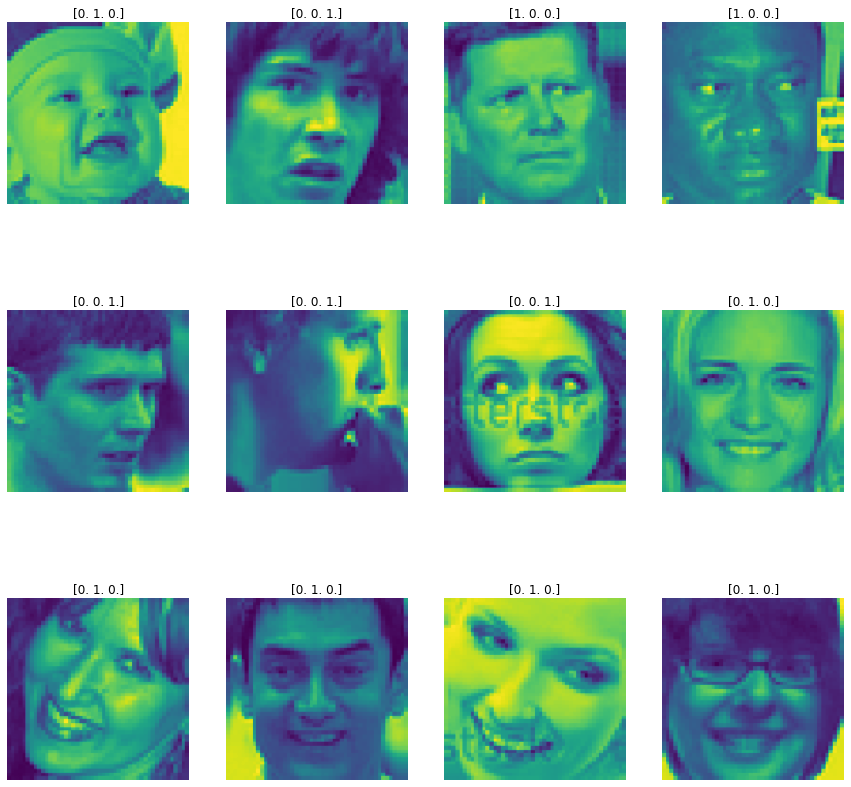

In [165]:
## Plot gambar

import numpy as np
import matplotlib.pylab as plt

plt.figure(figsize=[15,15])
for i in range(12):
    x, y = random.choice(train_generator)
    plt.subplot(3, 4, i+1)
    for im, lb in zip(x, y):
        plt.title(str(lb))
        plt.imshow(im.reshape(img_height, img_width))
        plt.axis('off')
plt.show()

# Training

In [166]:
## build architecture
num_cls = len(train_generator.class_indices)

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(128, (3,3), padding="same", activation="relu", input_shape=(img_height, img_width, 1), use_bias=True),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Conv2D(128,(3,3), padding="same", activation="relu"),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.MaxPooling2D(2,2),
  
  tf.keras.layers.Conv2D(256,(3,3), padding="same", activation="relu"),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Conv2D(128,(3,3), padding="same", activation="relu"),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.MaxPooling2D(2,2),
  
  tf.keras.layers.Conv2D(64,(3,3), padding="same", activation="relu", use_bias=True),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.MaxPooling2D(2,2),

#   tf.keras.layers.Conv2D(128,(3,3), padding="same", activation="relu", use_bias=True),
# #   tf.keras.layers.Dropout(0.3),
#   tf.keras.layers.MaxPooling2D(2,2),
    
  # tf.keras.layers.Conv2D(256,(3,3), padding="same", activation="relu", use_bias=True, kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
  # tf.keras.layers.Dropout(0.4),
  # tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Flatten(),
  
  tf.keras.layers.Dense(512, activation="relu", use_bias=True, kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
  tf.keras.layers.Dropout(0.2),
    
  tf.keras.layers.Dense(256, activation="relu", use_bias=True, kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
  tf.keras.layers.Dropout(0.2),
    
  # tf.keras.layers.Dense(64, activation="relu", use_bias=True),
  # tf.keras.layers.Dropout(0.2),
  
  tf.keras.layers.Dense(num_cls, activation="softmax")
])

model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_102 (Conv2D)          (None, 128, 128, 128)     1280      
_________________________________________________________________
max_pooling2d_102 (MaxPoolin (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_103 (Conv2D)          (None, 64, 64, 128)       147584    
_________________________________________________________________
dropout_84 (Dropout)         (None, 64, 64, 128)       0         
_________________________________________________________________
max_pooling2d_103 (MaxPoolin (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_104 (Conv2D)          (None, 32, 32, 256)       295168    
_________________________________________________________________
dropout_85 (Dropout)         (None, 32, 32, 256)     

In [167]:
## compile model

opt_adam = tf.optimizers.Adam(learning_rate=0.01)
opt_rms = tf.optimizers.RMSprop(learning_rate=1e-3)
opt_sgd = tf.optimizers.SGD(learning_rate=0.1)

model.compile(
  loss = 'categorical_crossentropy',
  optimizer = opt_sgd,
  metrics = ['accuracy']
)

In [168]:
## define callbacks

early_stopping = tf.keras.callbacks.EarlyStopping(
  monitor = "val_accuracy",
  patience = 10,
  verbose = 0,
  mode = "auto",
  restore_best_weights=True
)

callbacks = [early_stopping]

In [169]:
## Train model

STEP_PER_EPOCH = train_generator.n // train_generator.batch_size
VALIDATION_STEPS = validation_generator.n // validation_generator.batch_size

with tf.device("/device:GPU:0"):
  history = model.fit(
      train_generator,
      steps_per_epoch = STEP_PER_EPOCH,
      epochs = 100,
      validation_data = validation_generator,
      validation_steps = VALIDATION_STEPS,
      verbose = 1,
      callbacks = callbacks
  )

Epoch 1/100
376/376 [==============================] - 20s 52ms/step - loss: 6.3984 - accuracy: 0.3480 - val_loss: 3.3696 - val_accuracy: 0.3421
Epoch 2/100
376/376 [==============================] - 19s 51ms/step - loss: 2.2740 - accuracy: 0.3490 - val_loss: 1.6068 - val_accuracy: 0.3413
Epoch 3/100
376/376 [==============================] - 18s 49ms/step - loss: 1.3523 - accuracy: 0.3933 - val_loss: 1.2037 - val_accuracy: 0.4383
Epoch 4/100
376/376 [==============================] - 19s 51ms/step - loss: 1.1302 - accuracy: 0.4344 - val_loss: 1.1119 - val_accuracy: 0.4579
Epoch 5/100
376/376 [==============================] - 19s 50ms/step - loss: 1.0661 - accuracy: 0.4562 - val_loss: 1.0682 - val_accuracy: 0.4553
Epoch 6/100
376/376 [==============================] - 18s 49ms/step - loss: 1.0175 - accuracy: 0.4948 - val_loss: 1.0379 - val_accuracy: 0.5055
Epoch 7/100
376/376 [==============================] - 19s 50ms/step - loss: 0.9721 - accuracy: 0.5327 - val_loss: 1.0163 - val_ac

In [173]:
## model evaluate

loss, acc = model.evaluate(validation_generator)
print(f"valid accuracy: {acc} \nvalid loss: {loss}")

95/95 [==============================] - 1s 14ms/step - loss: 0.7203 - accuracy: 0.7377
valid accuracy: 0.7376909852027893 
valid loss: 0.7203103303909302


# Evaluation Model

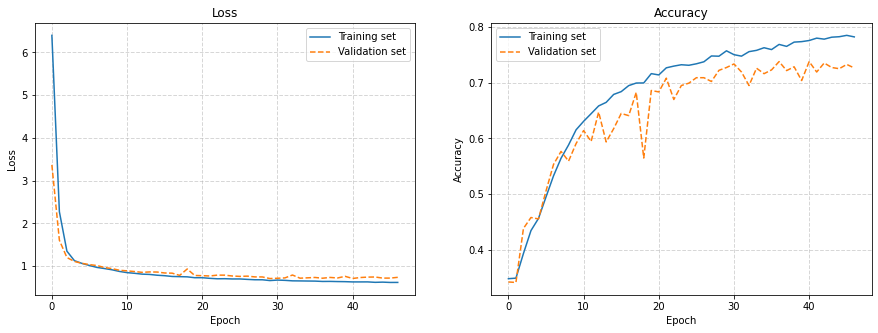

In [174]:
## Plot accuracy dan Loss

loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(loss, label='Training set')
plt.plot(val_loss, label='Validation set', linestyle='--')
plt.legend()
plt.grid(linestyle='--', linewidth=1, alpha=0.5)

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(acc, label='Training set')
plt.plot(val_acc, label='Validation set', linestyle='--')
plt.legend()
plt.grid(linestyle='--', linewidth=1, alpha=0.5)

plt.show()

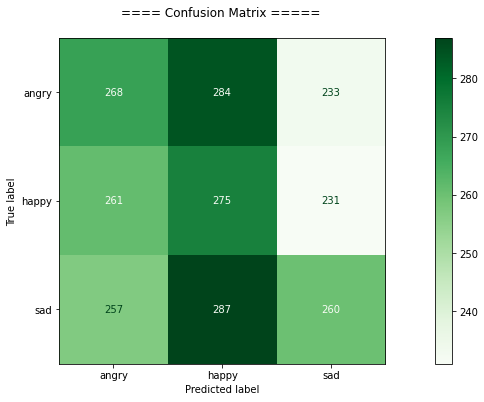


=============== Classification Report ================
              precision    recall  f1-score   support

       angry       0.34      0.34      0.34       785
       happy       0.33      0.36      0.34       767
         sad       0.36      0.32      0.34       804

    accuracy                           0.34      2356
   macro avg       0.34      0.34      0.34      2356
weighted avg       0.34      0.34      0.34      2356



In [175]:
## Plot Confusion Matrix dan Classification Report

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

labels_list = list(train_generator.class_indices.keys())


fig, ax = plt.subplots(figsize=(18, 6))
cm = confusion_matrix(validation_generator.classes, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels_list)
disp.plot(cmap=plt.cm.Greens, ax=ax)
plt.title("==== Confusion Matrix ===== \n")
plt.show()


print("\n=============== Classification Report ================")
print(classification_report(validation_generator.classes, y_pred, target_names=labels_list))

# Deployment

In [ ]:
## save model keras *.h5

if os.path.exists('model')==False:
  os.mkdir('model')

model.save_weights("model/model_weights.h5")
model.save("model/model.h5")

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Convert Model keras ke tflite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

## save model *.tflite
with open('model/model.tflite', 'wb') as f:
  f.write(tflite_model)